## Task 1:
### Problem - Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10 datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html


# CIFAR-10 Multiple Classes
# New section
Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [3]:
#
# Your code to import matplotlib, pandas and numpy libraries
##
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#



Following code loads the CIFAR 10 datset.

In [4]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
#
# Your code to print shapes of training and test data. Check how the data looks
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
# Your code to print the shape of one image.
print(x_train.shape[1])

32


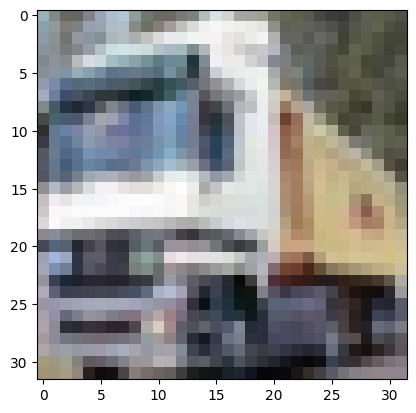

In [7]:
# Your code to show any sample image in the dataset. Use - plt.imshow()

plt.imshow(x_train[1])

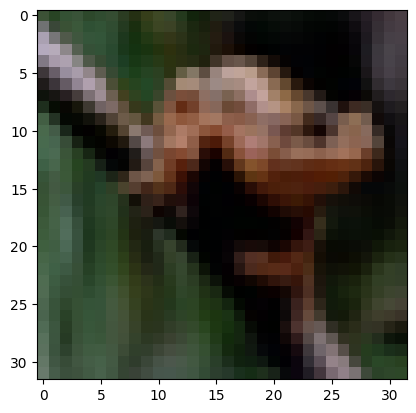

In [8]:
# Show any other image
plt.imshow(x_train[5000])

# PreProcessing

In [9]:
# Your code to print one image in digitals. Check how pixels look like. 
print(x_train[1])

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


In [10]:
# Your code to print shape of any image i.e particular value in the x_train
print(x_train.shape[1])

32


In [11]:
# Your code to print the maximum value in x_train. Hint - Use .max()
print(x_train.max())

255


In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
# Print the shape of x_train again.
print(x_train.shape)


(50000, 32, 32, 3)


In [14]:
# Print the shape of y_train again.
print(y_train.shape)

(50000, 1)


# One hot vector encoding.
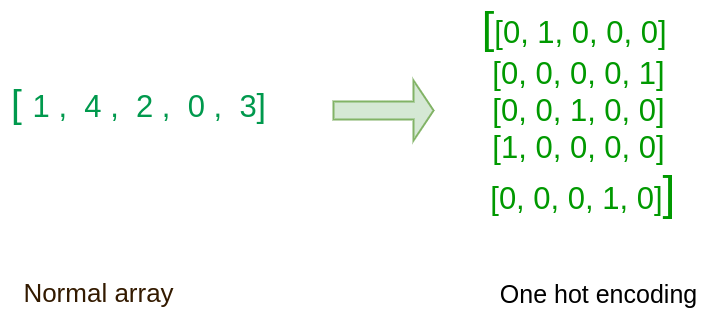


The "to_categorical()" is converting the integer value to binary categorical matrix :: https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

In [15]:
from tensorflow.keras.utils import to_categorical

# Your code to print shape of y_train [0]
print(y_train.shape[0])
# Your code to use to_categorical to convert integers to numbers. Assign the new array to the variable y_cat_train
y_cat_train=to_categorical(y_train,10)

50000


In [16]:
# Your code to print shape of the array y_cat_train
print(y_cat_train.shape)


(50000, 10)


In [17]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.
print(y_cat_train[1])
print(y_train[1])

# Compare the result for better understanding of "to_categorical()"

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[9]


In [18]:
# Your code to:
# Convert y_test to the encoded vector in same manner/ Assign it to the variable y_cat_test
y_cat_test=to_categorical(y_test,10)

# Print the shapes to look how y_cat_test looks.
y_cat_test.shape


(10000, 10)

----------
# Building the Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [20]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

#
# Add more convolution and pooling layers with your choice of filters, strides, and activation function
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='sigmoid',))
model.add(MaxPool2D(pool_size=(2, 2)))
#

model.add(Flatten())

#
# Add few dense layers. 
model.add(Dense(10, activation=tf.nn.softmax))
#




In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 10)                5

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [43]:
# Your code to compile the models (model.compile). Use 'categorical cross entropy' as the loss function

# and use 'accuracy' as the metrics
# Your can use the optimiser of your choice
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])



In [44]:
# Your code to fit the model (model.fit). Use additional parameter -  callbacks = [early_stop] to eanable early stopping. 
# use 'history' array to save the training parameters for each epoch
history = model.fit(x_train, y_cat_train, epochs=20, validation_data=(x_test, y_cat_test) , verbose=1, callbacks=[early_stop])


Epoch 1/20
1563/1563 [==============================] - 34s 20ms/step - loss: 0.9419 - accuracy: 0.6721 - val_loss: 1.0232 - val_accuracy: 0.6437
Epoch 2/20
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9348 - accuracy: 0.6740 - val_loss: 0.9862 - val_accuracy: 0.6578
Epoch 3/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9239 - accuracy: 0.6795 - val_loss: 0.9902 - val_accuracy: 0.6552
Epoch 4/20
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9139 - accuracy: 0.6811 - val_loss: 1.0002 - val_accuracy: 0.6555
Epoch 5/20
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9074 - accuracy: 0.6845 - val_loss: 0.9716 - val_accuracy: 0.6629
Epoch 6/20
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8983 - accuracy: 0.6860 - val_loss: 0.9792 - val_accuracy: 0.6603
Epoch 7/20
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8946 - accuracy: 0.6885 - val_loss: 0.9960 -

### We can save the model in a file. Following code shows how to do this.

In [45]:
# Careful, don't overwrite file!
model.save('cifar_10epochs.keras')

### We can save the loss at every step. Following code shows how to do this. 

In [46]:
losses = pd.DataFrame(model.history.history)

In [47]:
# Print first few rows of losses.
print(losses.head())

       loss  accuracy  val_loss  val_accuracy
0  0.941915   0.67206  1.023228        0.6437
1  0.934784   0.67400  0.986177        0.6578
2  0.923947   0.67952  0.990177        0.6552
3  0.913892   0.68106  1.000193        0.6555
4  0.907382   0.68452  0.971576        0.6629


### Visualise a plot between accuracy vs val_accuracy for all steps.

### x axis will have the steps (epochs) 
### y axis will have accuracy and val_accuracy 





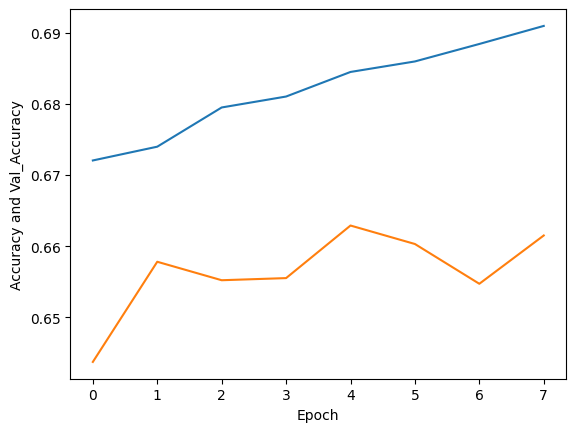

In [48]:
# 
# Your code to plot accuracy and val_accuracy vs the epochs

plt.plot(losses['accuracy'], label='accuracy')
plt.plot(losses['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and Val_Accuracy')

plt.show()



#


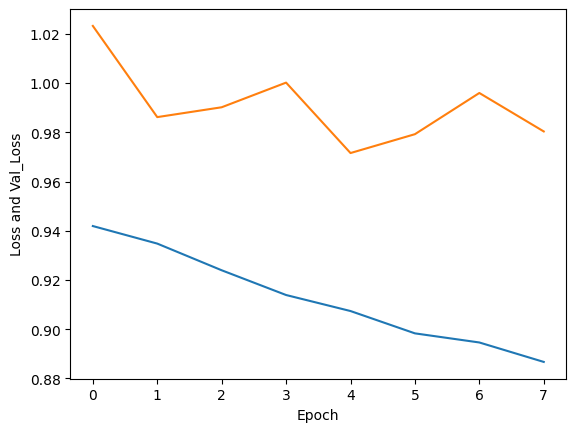

In [49]:
# 
# Your code to plot loss and val_loss vs the epochs
# 


plt.plot(losses['loss'], label='accuracy')
plt.plot(losses['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss and Val_Loss')

plt.show()

#


#

### You could print the metrics name that model have used.

### Following code shows how to do this.

In [50]:
model.metrics_names

['loss', 'accuracy']

### Following code shows how to evaluate your model.

In [51]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9803552627563477, 0.6614999771118164]

### Make a prediction on test data set.   

In [52]:
predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

313/313 [==============================] - 3s 8ms/step


### We could get the full classification report. 

In [53]:
# Your code to import classification_report library from sklearn.metrics
from sklearn.metrics import classification_report


In [54]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.74      0.64      0.68      1000\n           1       0.77      0.81      0.79      1000\n           2       0.60      0.45      0.51      1000\n           3       0.56      0.39      0.46      1000\n           4       0.50      0.70      0.59      1000\n           5       0.61      0.55      0.58      1000\n           6       0.70      0.81      0.75      1000\n           7       0.62      0.78      0.69      1000\n           8       0.76      0.75      0.76      1000\n           9       0.78      0.75      0.76      1000\n\n    accuracy                           0.66     10000\n   macro avg       0.66      0.66      0.66     10000\nweighted avg       0.66      0.66      0.66     10000\n'

### We could also get and plot confusion matrix. 

https://github.com/matplotlib/matplotlib/issues/14751

In [55]:
# Your code to import confusion_matrix library from sklearn.metrics
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(y_test,predictions)

array([[637,  40,  69,  12,  53,   9,  12,  25, 103,  40],
       [ 17, 806,   8,   8,   4,   2,  15,  15,  33,  92],
       [ 58,  11, 446,  35, 188,  74,  88,  71,  16,  13],
       [ 15,  11,  56, 392, 139, 171, 105,  79,  19,  13],
       [ 14,   7,  40,  24, 701,  22,  65, 107,  15,   5],
       [  6,   6,  50, 136, 104, 547,  41,  88,  14,   8],
       [  4,   2,  31,  37,  76,  13, 807,  24,   4,   2],
       [  5,   7,  29,  23,  86,  43,   9, 781,   5,  12],
       [ 77,  65,  10,  16,  20,   9,   6,  14, 752,  31],
       [ 28,  92,   4,  16,  21,   9,  12,  46,  26, 746]], dtype=int64)

<Axes: >

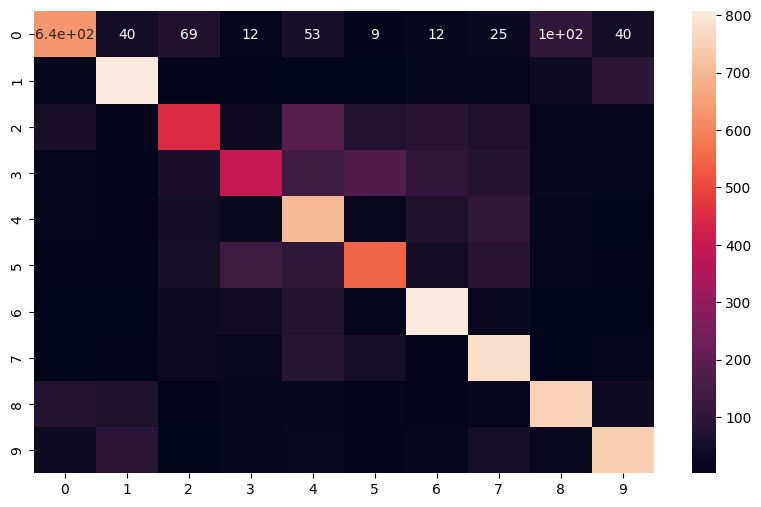

In [57]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


# Following code makes a prediction on specific image.

In [58]:
my_image = x_test[16]

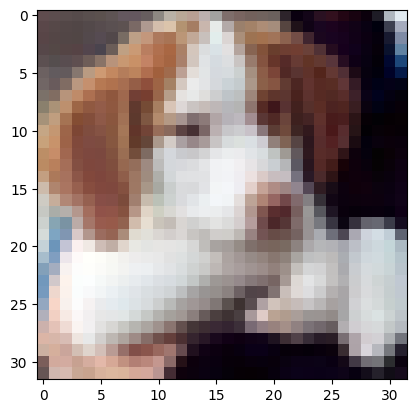

In [59]:
plt.imshow(my_image)

In [60]:
# SHAPE --> (num_images,width,height,color_channels)

model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 57ms/step


array([[9.3825394e-05, 1.5865731e-03, 2.8814655e-03, 8.6439610e-02,
        2.8155796e-04, 9.0291959e-01, 1.4833134e-03, 2.7707350e-03,
        1.1022703e-03, 4.4110918e-04]], dtype=float32)

In [1]:
# Find the highest probability value in the vector above. 
# What output value does it point to?

In [ ]:
# Check your result to run the code:

np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)

### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img

# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

## Task 2:

Evaluate your model for different optimisers available in the Keras. 

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


In [3]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
optimizers=
# Create an empty list to store scores

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

# Plot score vs optimiser 

# Lab logbook requirement: 
# Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends. 
# Based on this analysis, determine the optimal number of epochs for training your model. 